In [124]:
import pandas as pd

path = 'dataset_tsmc2014/dataset_TSMC2014_NYC.txt'
data = pd.read_csv(path,sep='\t',header=None,
    names=['uid','vid','vcid','vc_name','lat','long','timezone_offset','utc_time'])
# user_id, venue_id, venue_category_id, venue_category_name, latitude, longitude, timezone_offset_in_minutes, UTC_time
data.head()


,uid,vid,vcid,vc_name,lat,long,timezone_offset,utc_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [125]:
vcids=data.vcid.to_numpy()
print('total records:',len(vcids))
print('total vcs:',len(set(vcids)))

total records: 227428
total vcs: 400


In [126]:
from random import randint
print('random vc:',data.vc_name[randint(0,len(data)-1)])

random vc: Road


In [127]:
vc_names=set(data.vc_name)
print('total vc_names:',len(vc_names))
print(vc_names)

total vc_names: 251
{'Furniture / Home Store', 'Burrito Place', 'Planetarium', 'Cupcake Shop', 'Taxi', 'Event Space', 'Mediterranean Restaurant', 'Tattoo Parlor', 'Latin American Restaurant', 'Malaysian Restaurant', 'Casino', 'Home (private)', 'Music Store', 'Ferry', 'Gas Station / Garage', 'College Stadium', 'Market', 'Bike Shop', 'Post Office', 'River', 'Bike Rental / Bike Share', 'Portuguese Restaurant', 'School', 'Tea Room', 'Steakhouse', 'Movie Theater', 'Donut Shop', 'Subway', 'Antique Shop', 'Garden', 'Financial or Legal Service', 'Board Shop', 'Museum', 'Stadium', 'Convention Center', 'Spiritual Center', 'Molecular Gastronomy Restaurant', 'Convenience Store', 'Nursery School', 'Moving Target', 'General Travel', 'Laundry Service', 'Playground', 'Drugstore / Pharmacy', 'Arcade', 'Arts & Crafts Store', 'Coffee Shop', 'Chinese Restaurant', 'Outdoors & Recreation', 'Mobile Phone Shop', 'Military Base', 'Pet Service', 'Gastropub', 'Science Museum', 'University', 'Cuban Restaurant', '

In [128]:
def big_vc_name(name:str):
    if 'Restaurant' in name or name in ['BBQ Joint','Fish & Chips Shop','Fried Chicken Joint','Salad Place',
    'Steakhouse','Breakfast Spot','Burrito Place','Sandwich Place','Ramen /  Noodle House','Burger Joint',
    'Taco Place', 'Hot Dog Joint','Wings Joint','Soup Place','Pizza Place','cafe','Diner','Mac & Cheese Joint']: 
        return 'Restaurant'
    elif name in ['Deli / Bodega','Snack Place','Ice Cream Shop','Candy Store',
    'Bagel Shop','Food Truck','Cupcake Shop','Bakery','Donut Shop',
    'Dessert Shop','Food','Food & Drink Shop']:
        return 'Food & Snack'
    elif 'School' in name or name in ['College Academic Building','University',
    'Community College','College & University','General College & University','Student Center']:
        return 'School'
    elif name in ['College Stadium','Playground','Bowling Alley','Pool Hall','Ski Area',
    'Gym / Fitness Center','Stadium','Pool','Athletic & Sport']:
        return 'Place for Sports'
    elif name in ['Ferry','Bus Station','Light Rail','Train Station','Taxi','Airport','Subway']:
        return 'Transportation'
    elif 'Museum' in name or name in ['Public Art','Arts & Entertainment',
    'Historic Site','Arts & Crafts Store','Art Gallery','Sculpture Garden',
    'Music Venue','Antique Shop','Music Store','Thrift / Vintage Store']:
        return 'History, Museum & Arts'
    elif name in ['Nail Salon','Salon / Barbershop','Tanning Salon','Cosmetics Shop','Spa / Massage',
    'Tattoo Parlor']:
        return 'Beauty, Cosmetology & Hairdressing'
    elif name in ['Motorcycle Shop','Board Shop','Bike Rental / Bike Share',
    'Rental Car Location','Automotive Shop','Bike Shop']:
        return 'Vehicle Shop'
    elif name in ['Gas Station / Garage','Car Wash','Parking','Car Dealership']:
        return 'Vehicle-Related Place'
    elif name in ['Movie Theater','Comedy Club','Casino','Bar',
    'Tea Room','Other Nightlife','General Entertainment',
    'Nightlife Spot','College Theater','Performing Arts Venue','Theater',
    'Internet Cafe','Coffee Shop','Gaming Cafe',
    'Gastropub','Arcade','Beer Garden','Concert Hall']:
        return 'Indoor Entertainment'
    elif name in ['Racetrack','Harbor / Marina','Outdoors & Recreation','Zoo','Park','Aquarium',
    'Beach','Plaza','Other Great Outdoors','Scenic Lookout','Garden','Garden Center','Campground']:
        return 'Outdoor Entertainment'
    elif name in ['Spiritual Center','Church','Synagogue','Shrine','Mosque','Temple']:
        return 'Religion & Spirituality'
    elif name in ['Sorority House','Event Space','Fraternity House']:
        return 'Place for Socializing'
    elif name in ['Flea Market','Market','Fair','Department Store','Convenience Store','Mall']:
        return 'Store, Market & Fair'
    elif name in ['General Travel','Travel & Transport','Travel Lounge']:
        return 'Travel-Related Place'
    elif name in ['Jewelry Store','Clothing Store','Bridal Shop']:
        return 'Clothing & Jewelry'
    elif name in ['Drugstore / Pharmacy','Medical Center']:
        return 'Medical-Related Place'
    elif name in ['Pet Service','Pet Store','Animal Shelter']:
        return 'Pet-Related Place'
    elif name in ['Residential Building (Apartment / Condo)','Housing Development','Home (private)']:
        return 'Residence'
    elif name in ['Winery','Distillery','Brewery']:
        return 'Alcohoic-Related Place'
    elif name in ['Video Store','Gift Shop','Video Game Store','Toy / Game Store','Record Shop']:
        return 'Shop Related to Entertainment'
    elif name in ['Planetarium','Bookstore','Library']:
        return 'General Education Place'
    else: return name
data['big_vc_name']=[big_vc_name(name) for name in data.vc_name]
big_vc_names=set(data.big_vc_name)
print('total big_vc_names:',len(big_vc_names))
print(big_vc_names)

total big_vc_names: 62
{'Bridge', 'Professional & Other Places', 'Furniture / Home Store', 'Shop & Service', 'Residence', 'Funeral Home', 'Place for Sports', 'Mobile Phone Shop', 'Hotel', 'City', 'Vehicle-Related Place', 'Military Base', 'Recycling Facility', 'Clothing & Jewelry', 'Electronics Store', 'Camera Store', 'Neighborhood', 'Embassy / Consulate', 'River', 'Post Office', 'Vehicle Shop', 'Hardware Store', 'Religion & Spirituality', 'History, Museum & Arts', 'Office', 'School', 'Hobby Shop', 'Smoke Shop', 'Indoor Entertainment', 'Beauty, Cosmetology & Hairdressing', 'Road', 'Travel-Related Place', 'Cemetery', 'Rest Area', 'Government Building', 'Building', 'General Education Place', 'Financial or Legal Service', 'Alcohoic-Related Place', 'Convention Center', 'Place for Socializing', 'Medical-Related Place', 'Transportation', 'Storage Facility', 'Paper / Office Supplies Store', 'Design Studio', 'Moving Target', 'Miscellaneous Shop', 'Shop Related to Entertainment', 'Newsstand', 'B

In [129]:
from datetime import datetime

def time_handler(t_str):
    t_list=t_str.split()
    return ' '.join([t_list[1],t_list[2],t_list[3],t_list[-1]])

# t=datetime.strptime(time_handler('Tue Apr 03 18:02:41 +0000 2012'),'%b %d %H:%M:%S %Y')
# print(t) # output 2012-04-03 18:02:41

data['utc_time_value']=[datetime.strptime(time_handler(t_str),'%b %d %H:%M:%S %Y') for t_str in data.utc_time]
print(data.head())

   uid                       vid                      vcid  \
0  470  49bbd6c0f964a520f4531fe3  4bf58dd8d48988d127951735   
1  979  4a43c0aef964a520c6a61fe3  4bf58dd8d48988d1df941735   
2   69  4c5cc7b485a1e21e00d35711  4bf58dd8d48988d103941735   
3  395  4bc7086715a7ef3bef9878da  4bf58dd8d48988d104941735   
4   87  4cf2c5321d18a143951b5cec  4bf58dd8d48988d1cb941735   

               vc_name        lat       long  timezone_offset  \
0  Arts & Crafts Store  40.719810 -74.002581             -240   
1               Bridge  40.606800 -74.044170             -240   
2       Home (private)  40.716162 -73.883070             -240   
3       Medical Center  40.745164 -73.982519             -240   
4           Food Truck  40.740104 -73.989658             -240   

                         utc_time             big_vc_name      utc_time_value  
0  Tue Apr 03 18:00:09 +0000 2012  History, Museum & Arts 2012-04-03 18:00:09  
1  Tue Apr 03 18:00:25 +0000 2012                  Bridge 2012-04-03 18:00:2

In [130]:
from datetime import timedelta
from tqdm import tqdm
import numpy as np

# get time granularity
user_curr_t=dict()
gaps=[]
min_gap=timedelta(seconds=3600)
for i in tqdm(range(len(data))):
    uid=data.uid[i]
    curr_t,prev_t=data.utc_time_value[i],user_curr_t.get(uid,datetime.fromisoformat('2000-01-01'))
    gap=curr_t-prev_t
    if gap>timedelta(seconds=0):
        gaps.append(gap.total_seconds())
        if gap<min_gap: 
            min_gap=gap
        # if gap<timedelta(seconds=60):
        #     print('uid:',uid)
        #     print('curr_t:',curr_t)
        #     print('prev_t:',prev_t)
        user_curr_t.update({uid:curr_t})
print('min gap:',min_gap.total_seconds())
print('avg gap:',np.mean(gaps))

100%|██████████| 227428/227428 [00:12<00:00, 18882.06it/s]

min gap: 1.0
avg gap: 1970457.8718489162


0.2844731773197246


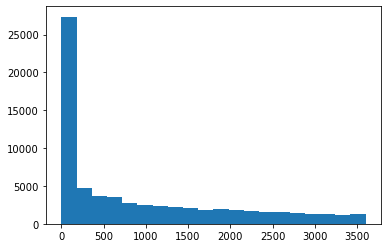

In [131]:
import matplotlib.pyplot as plt

ratio=np.sum((np.array(gaps)<36000) & (np.array(gaps)>3600))/len(gaps)
print(ratio)
# gaps=[g for g in gaps if g<3600]
# print('avg gap (<3600):',np.mean(gaps))

plt.hist([g for g in gaps if g<3600], bins=20)
plt.show()

In [132]:
init_time=data.utc_time_value[0]
time_granularity=3600
data['timestamp']=[int((t-init_time).total_seconds()/time_granularity) for t in data.utc_time_value]

In [133]:
data

,uid,vid,vcid,vc_name,lat,long,timezone_offset,utc_time,big_vc_name,utc_time_value,timestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,"History, Museum & Arts",2012-04-03 18:00:09,0
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,Bridge,2012-04-03 18:00:25,0
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,Residence,2012-04-03 18:02:24,0
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,Medical-Related Place,2012-04-03 18:02:41,0
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,Food & Snack,2012-04-03 18:03:00,0
...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,"History, Museum & Arts",2013-02-16 02:29:11,7640
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,Restaurant,2013-02-16 02:31:35,7640
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,Residence,2013-02-16 02:33:16,7640
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,Indoor Entertainment,2013-02-16 02:34:31,7640


In [134]:
data_processed=data.filter(['uid','vid','big_vc_name','timestamp'])

In [135]:
data_processed.head()

,uid,vid,big_vc_name,timestamp
0,470,49bbd6c0f964a520f4531fe3,"History, Museum & Arts",0
1,979,4a43c0aef964a520c6a61fe3,Bridge,0
2,69,4c5cc7b485a1e21e00d35711,Residence,0
3,395,4bc7086715a7ef3bef9878da,Medical-Related Place,0
4,87,4cf2c5321d18a143951b5cec,Food & Snack,0


In [136]:
from tqdm import tqdm

zero_df=np.zeros((data_processed.timestamp.to_list()[-1]+1,len(big_vc_names)))
# print(zero_df.shape)
colo_nums=pd.DataFrame(data=zero_df,columns=list(big_vc_names))
for i in tqdm(range(len(data_processed))):
    timestamp=data_processed.timestamp[i]
    colo_type=data_processed.big_vc_name[i]
    colo_nums[colo_type][timestamp]+=1

100%|██████████| 227428/227428 [01:13<00:00, 3074.30it/s]


In [137]:
colo_nums

,Bridge,Professional & Other Places,Furniture / Home Store,Shop & Service,Residence,Funeral Home,Place for Sports,Mobile Phone Shop,Hotel,City,...,Restaurant,"Store, Market & Fair",Pet-Related Place,Laundry Service,Flower Shop,Outdoor Entertainment,Sporting Goods Shop,Factory,Food & Snack,Castle
0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,...,10.0,2.0,1.0,0.0,0.0,3.0,1.0,0.0,7.0,0.0
1,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,1.0,0.0,...,11.0,1.0,0.0,1.0,0.0,7.0,0.0,1.0,7.0,0.0
2,0.0,0.0,0.0,0.0,11.0,0.0,4.0,0.0,2.0,0.0,...,14.0,3.0,0.0,0.0,0.0,6.0,1.0,0.0,10.0,0.0
3,1.0,0.0,0.0,0.0,12.0,0.0,9.0,0.0,0.0,0.0,...,13.0,3.0,0.0,1.0,0.0,7.0,0.0,0.0,7.0,0.0
4,0.0,0.0,0.0,0.0,13.0,0.0,14.0,0.0,0.0,0.0,...,20.0,4.0,0.0,0.0,0.0,8.0,1.0,0.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7639,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
colo_nums.to_csv(path[:-4]+'_processed.txt')